In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_predictions(model, X_test, Y_test):
  T = X_test.shape[1]
  D = X_test.shape[2]

  validation_target = Y_test
  validation_predictions_one_step = []
  validation_predictions_future_forecast = []
  
  # future predictions
  x = X_test[0]
  for t in X_test:
    pred = model.predict(x.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_future_forecast.append(prediction)
    x[:-1,:] = x[1:,:]
    x[-1,:] = prediction

  # one step prediction
  for t in X_test:
    pred = model.predict(t.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_one_step.append(prediction)
    

  # plot
  plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_one_step, label='forecast prediction')
  plt.title('One Step Prediction')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_future_forecast, label='forecast prediction')
  plt.title('Long term prediction')
  plt.legend();

  plt.show()

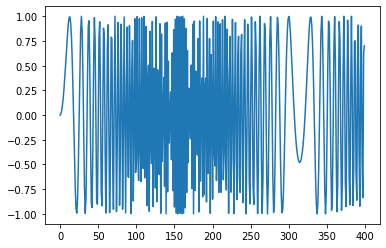

In [3]:
series = np.sin((0.1*np.arange(400))**2)

plt.plot(series)
plt.show()

In [4]:
T = 10
N = len(series)
D = 1
M = 5
idx = -N//2

X = []
Y = []
for t in range(N-T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)

print('X shape:', X.shape, ', Y shape:', Y.shape)

X shape: (390, 10, 1) , Y shape: (390,)


# Simple Auto Regressive model

Epoch 1/80
6/6 [==============================] - 1s 42ms/step - loss: 1.7314 - val_loss: 1.4808
Epoch 2/80
6/6 [==============================] - 0s 7ms/step - loss: 1.6358 - val_loss: 1.3965
Epoch 3/80
6/6 [==============================] - 0s 11ms/step - loss: 1.5432 - val_loss: 1.3191
Epoch 4/80
6/6 [==============================] - 0s 7ms/step - loss: 1.4578 - val_loss: 1.2471
Epoch 5/80
6/6 [==============================] - 0s 10ms/step - loss: 1.3800 - val_loss: 1.1795
Epoch 6/80
6/6 [==============================] - 0s 9ms/step - loss: 1.3057 - val_loss: 1.1162
Epoch 7/80
6/6 [==============================] - 0s 6ms/step - loss: 1.2360 - val_loss: 1.0571
Epoch 8/80
6/6 [==============================] - 0s 7ms/step - loss: 1.1712 - val_loss: 1.0021
Epoch 9/80
6/6 [==============================] - 0s 8ms/step - loss: 1.1115 - val_loss: 0.9508
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 1.0557 - val_loss: 0.9036
Epoch 11/80
6/6 [==================

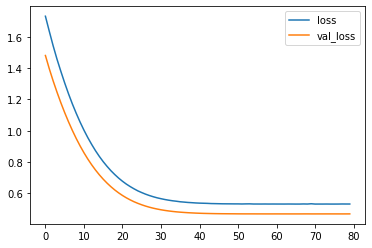

In [5]:
i = Input((T,D))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

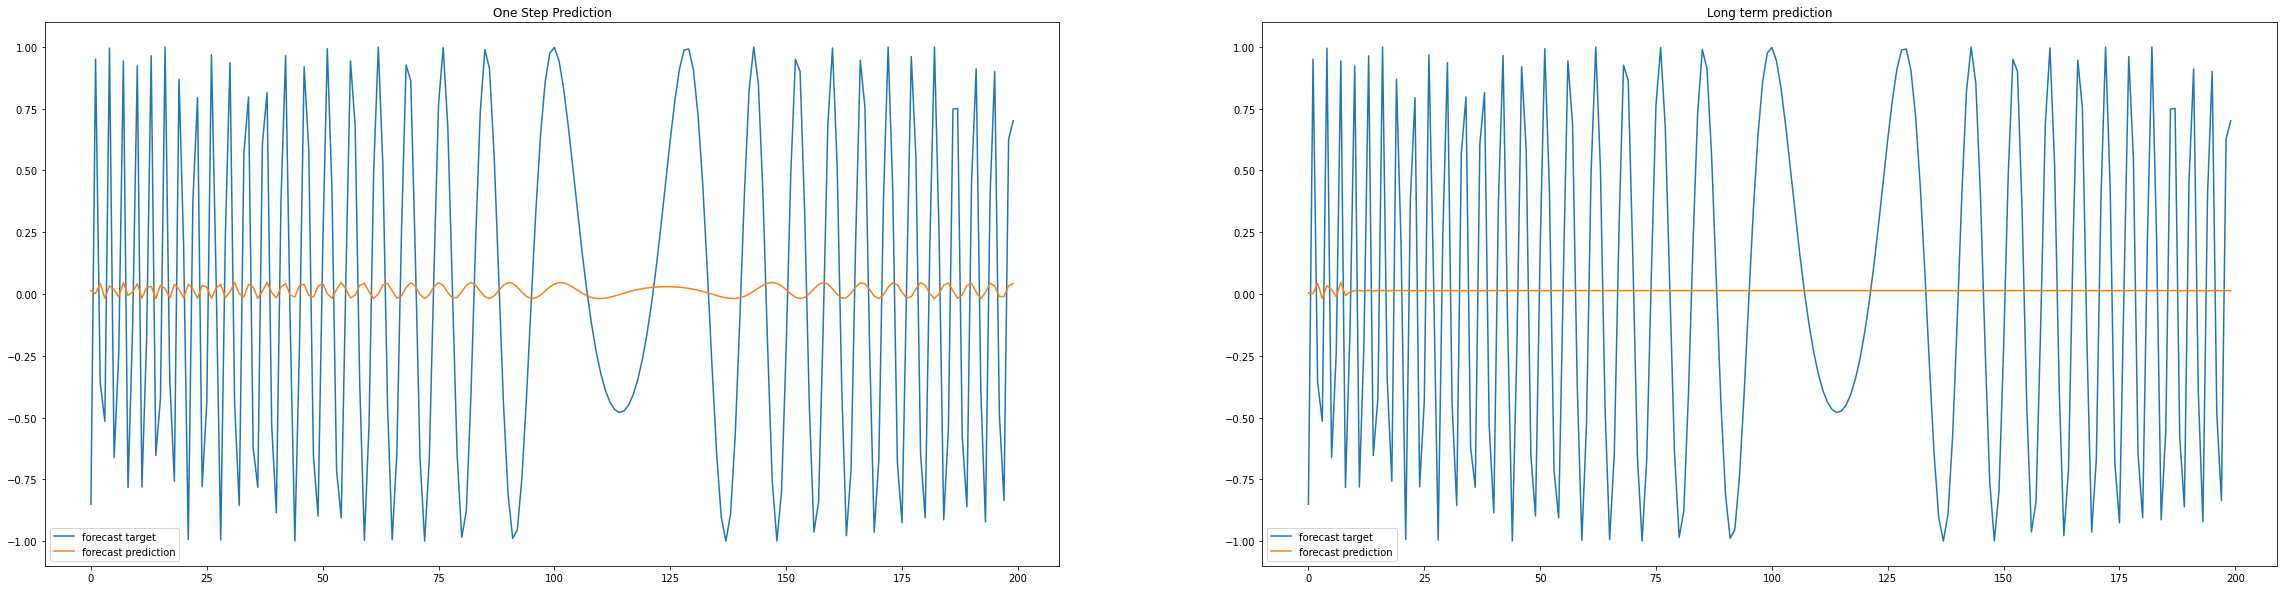

In [6]:
plot_predictions(model, X[idx:], Y[idx:])

# Simple RNN model

Epoch 1/200
6/6 [==============================] - 1s 57ms/step - loss: 0.7882 - val_loss: 0.5232
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4625 - val_loss: 0.6505
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4444 - val_loss: 0.5773
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3775 - val_loss: 0.4427
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3172 - val_loss: 0.3784
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.2926 - val_loss: 0.3958
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2561 - val_loss: 0.3219
Epoch 8/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2126 - val_loss: 0.3255
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1818 - val_loss: 0.2926
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1824 - val_loss: 0.2597
Epoch 11/200
6/6 [===

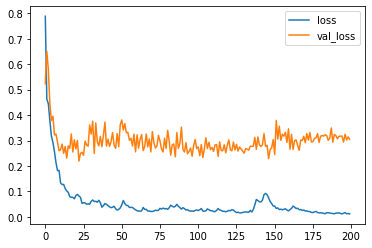

In [7]:
i = Input((T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

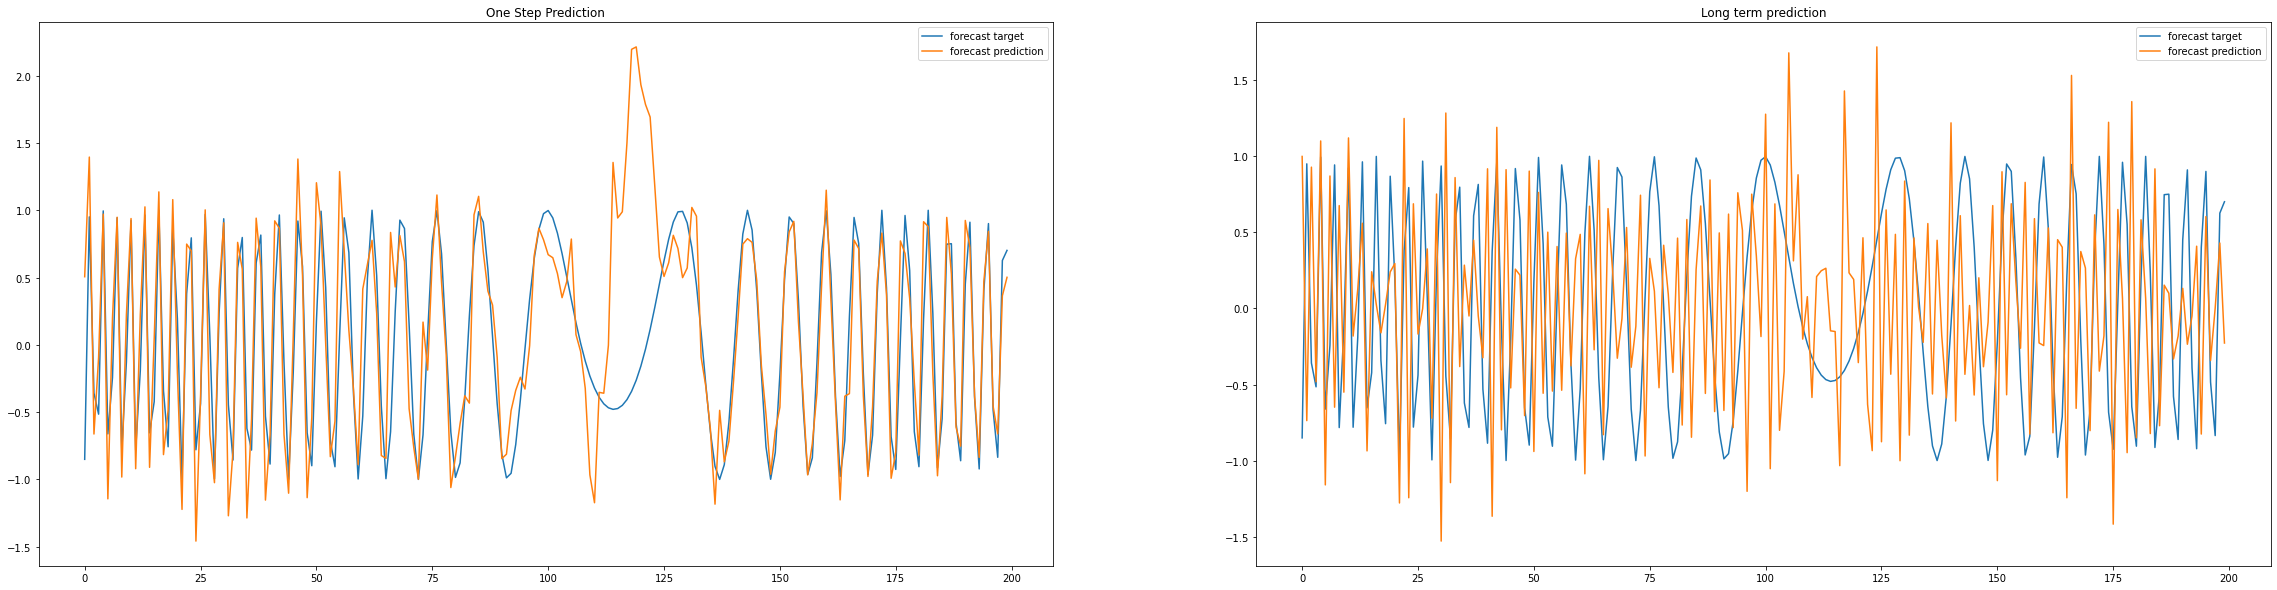

In [8]:
plot_predictions(model, X[idx:], Y[idx:])

# GRU model

Epoch 1/200
6/6 [==============================] - 2s 96ms/step - loss: 0.5894 - val_loss: 0.6795
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5157 - val_loss: 0.5896
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 0.5266 - val_loss: 0.5811
Epoch 4/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5016 - val_loss: 0.5744
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4862 - val_loss: 0.5913
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4804 - val_loss: 0.5487
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4504 - val_loss: 0.5076
Epoch 8/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4135 - val_loss: 0.4355
Epoch 9/200
6/6 [==============================] - 0s 12ms/step - loss: 0.3617 - val_loss: 0.3533
Epoch 10/200
6/6 [==============================] - 0s 14ms/step - loss: 0.2759 - val_loss: 0.3235
Epoch 11/200
6/6 [=

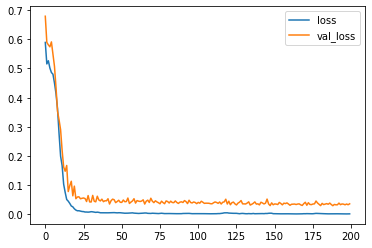

In [9]:
i = Input((T,D))
x = GRU(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

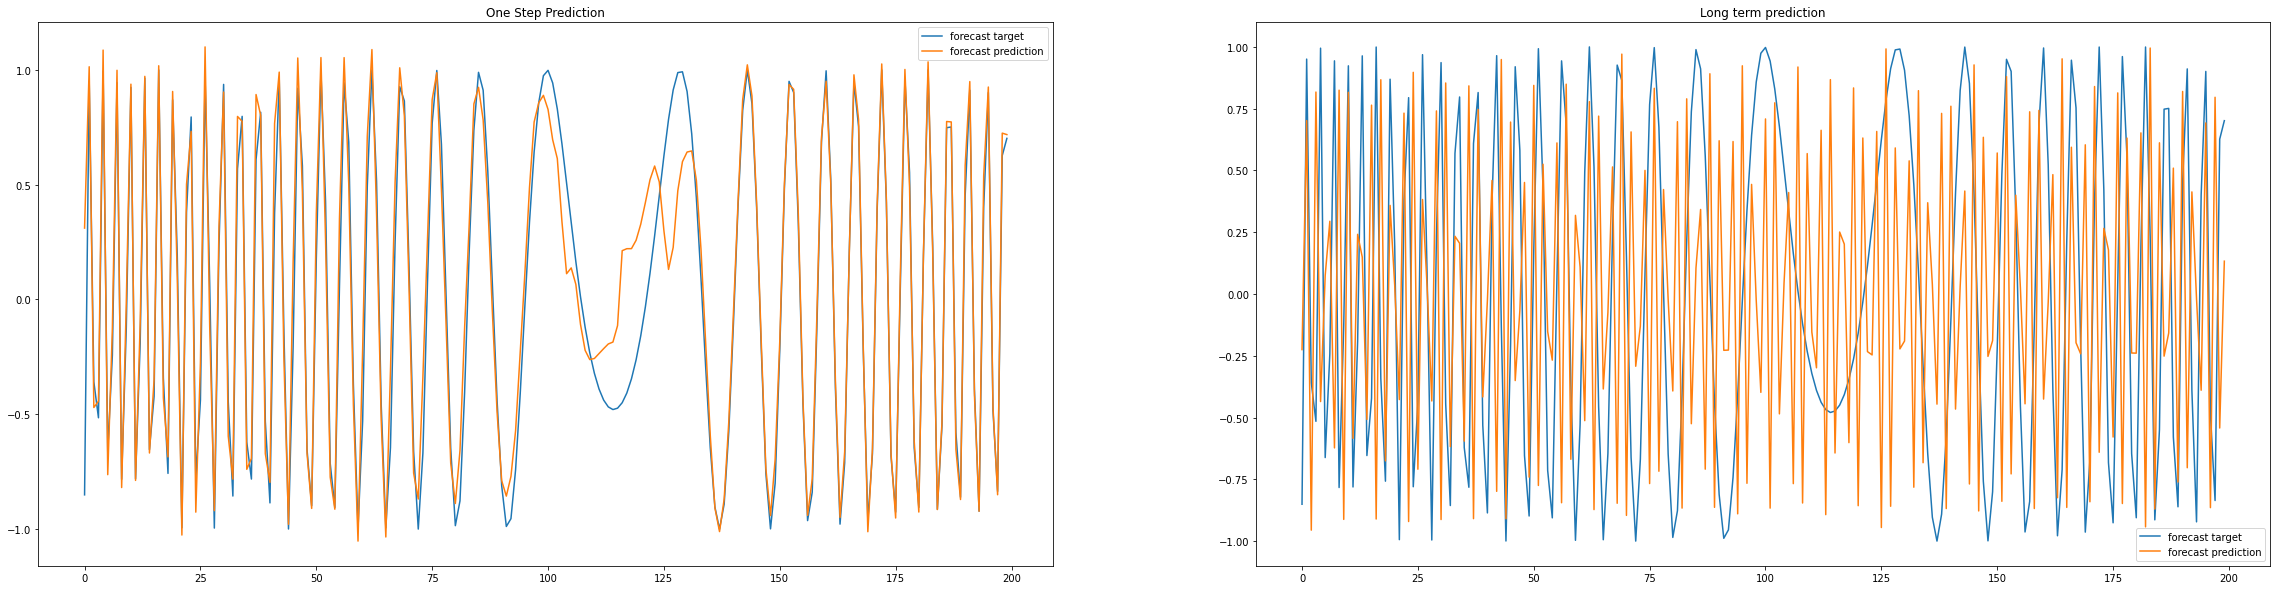

In [10]:
plot_predictions(model, X[idx:], Y[idx:])

# LSTM model

Epoch 1/200
6/6 [==============================] - 3s 175ms/step - loss: 0.5328 - val_loss: 0.4950
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5042 - val_loss: 0.5347
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4821 - val_loss: 0.5583
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4571 - val_loss: 0.5583
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4144 - val_loss: 0.5346
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3738 - val_loss: 0.5723
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3103 - val_loss: 0.5950
Epoch 8/200
6/6 [==============================] - 0s 15ms/step - loss: 0.2751 - val_loss: 0.4723
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 0.1968 - val_loss: 0.4153
Epoch 10/200
6/6 [==============================] - 0s 15ms/step - loss: 0.1498 - val_loss: 0.3818
Epoch 11/200
6/6 [

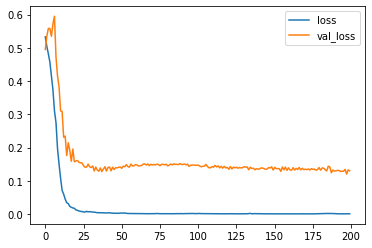

In [11]:
i = Input((T,D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

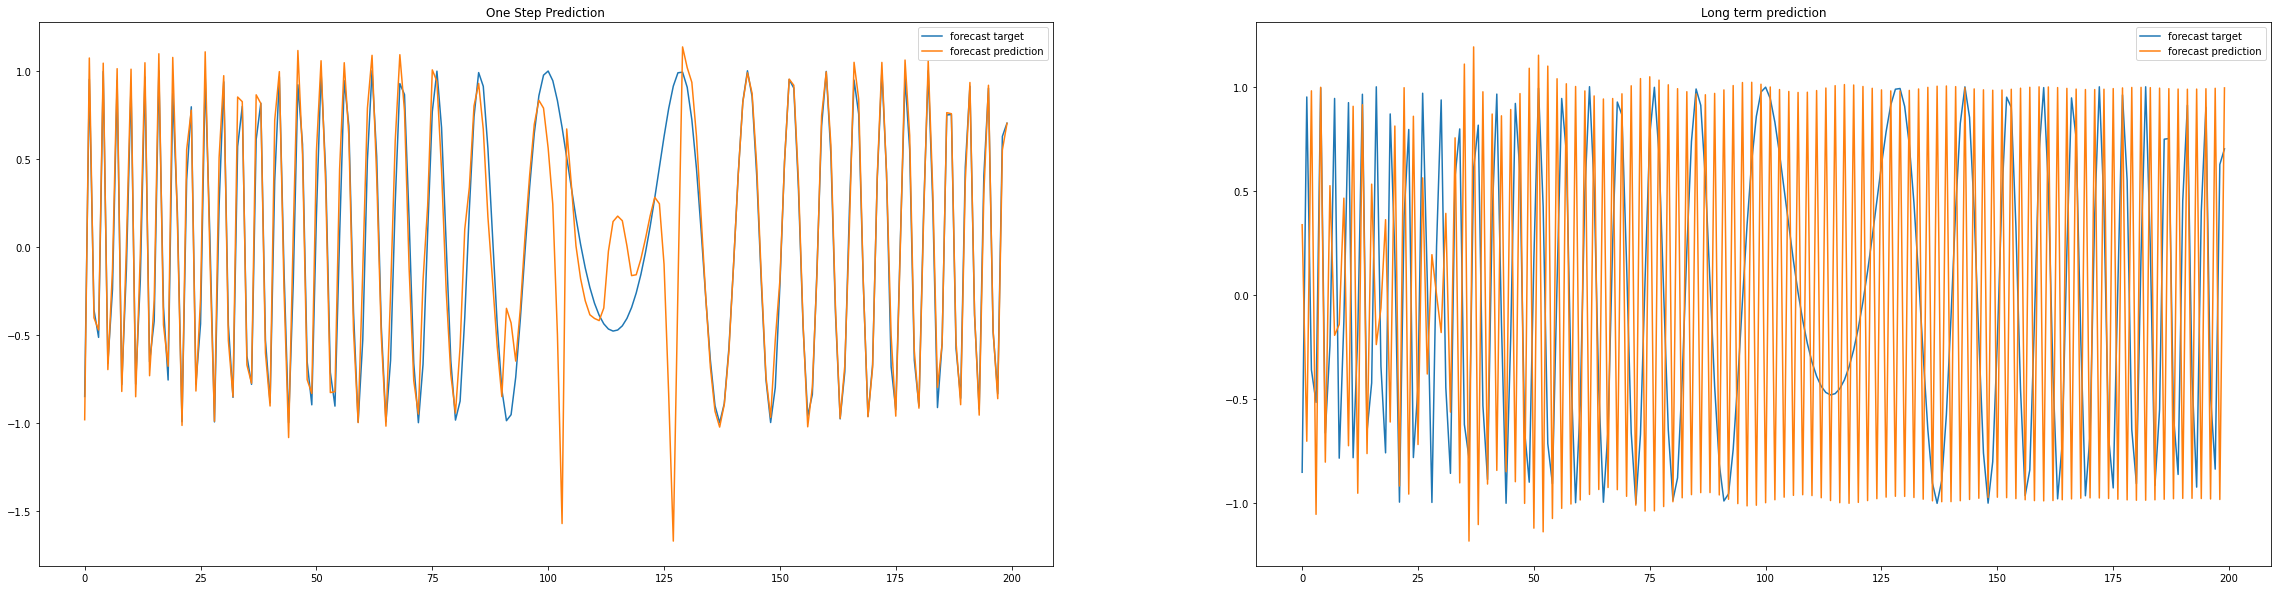

In [12]:
plot_predictions(model, X[idx:], Y[idx:])